In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('data/data.csv')

# Calculate 5 days moving average
df['sma_5'] = df.iloc[:,0].rolling(window=5).mean()
df['sma_14'] = df.iloc[:,0].rolling(window=14).mean()
df['sma_21'] = df.iloc[:,0].rolling(window=21).mean()

# Filter from lockdown 1.0 , i.e. 25 March
mask = (df['date'] >= '2020-03-25')
df = df.loc[mask]
df.tail()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered,sma_5,sma_14,sma_21
97,3602,91,1161,2020-05-06,53007,1785,15301,3149.0,2259.571429,1935.047619
98,3344,104,1475,2020-05-07,56351,1889,16776,3305.0,2379.357143,2043.761905
99,3339,97,1111,2020-05-08,59690,1986,17887,3382.4,2517.285714,2158.857143
100,3175,115,1414,2020-05-09,62865,2101,19301,3286.2,2613.000000,2244.761905
101,4296,111,1668,2020-05-10,67161,2212,20969,3551.2,2805.071429,2374.095238


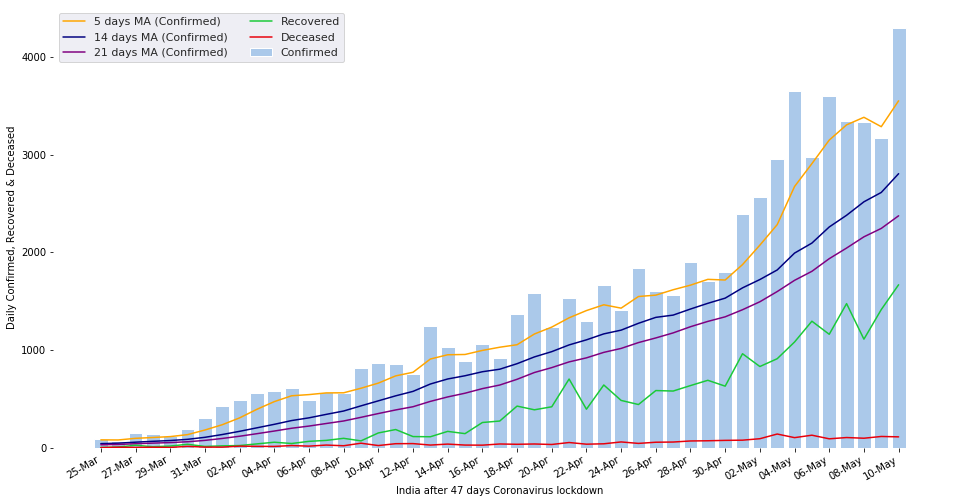

In [3]:
################################
# Daily plot

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.dailyconfirmed, color='b', label='Confirmed')

# Plot moving averages
sns.lineplot(x=df.date, y=df.sma_5, color='orange', label='5 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_14, color='navy', label='14 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_21, color='purple', label='21 days MA (Confirmed)')

sns.set_color_codes("bright")
sns.lineplot(x=df.date, y=df.dailyrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.dailydeceased, color='r', label='Deceased')

# handles,labels = axs.get_legend_handles_labels()
# handles = [handles[0], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[1], labels[2], labels[3]]

# set the frequency for labelling the xaxis
freq = int(2)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

# nicer label format for dates
fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=2, frameon=True)
axs.set(ylabel="Daily Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")

sns.despine(left=True, bottom=True)



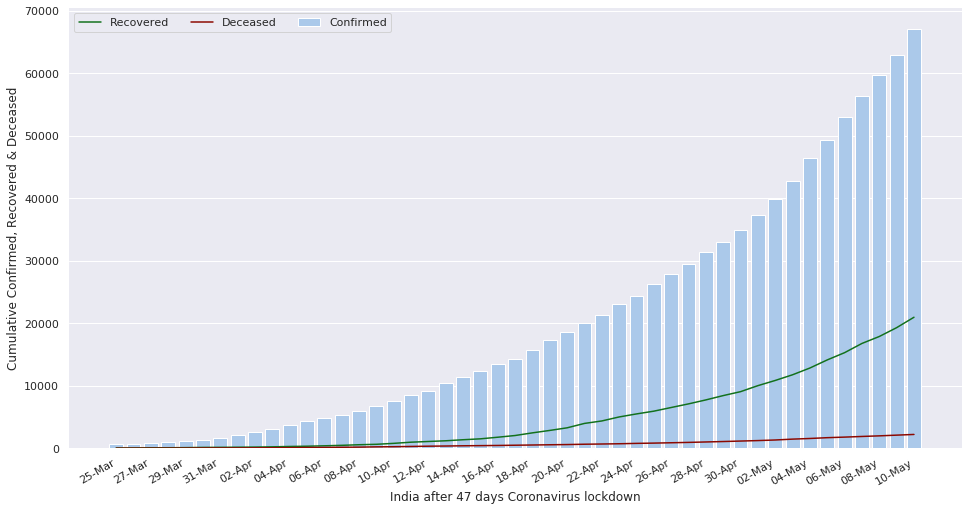

In [4]:
###############################
# Cumulative plot

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.totalconfirmed, color='b', label='Confirmed')
sns.set_color_codes("dark")
sns.lineplot(x=df.date, y=df.totalrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.totaldeceased, color='r', label='Deceased')

# set the frequency for labelling the xaxis
freq = int(2)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=3, frameon=True)
axs.set(ylabel="Cumulative Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")
sns.despine(left=True, bottom=True)

In [5]:
###############################3
# Testing plot

# load data
df_tested = pd.read_csv('data/tested.csv')
df_tested['updatetimestamp'] = pd.to_datetime(df_tested['updatetimestamp'], dayfirst=True) #.format('%Y-%m-%d')
df_tested['daily_tested'] = df_tested['totalsamplestested'] - df_tested['totalsamplestested'].shift()

df_tested.tail(5)


,individualstestedperconfirmedcase,positivecasesfromsamplesreported,samplereportedtoday,source,testpositivityrate,testsconductedbyprivatelabs,testsperconfirmedcase,totalindividualstested,totalpositivecases,totalsamplestested,updatetimestamp,daily_tested
57,NaN,NaN,NaN,https://www.icmr.gov.in/pdf/covid/update/ICMR_...,NaN,NaN,NaN,NaN,NaN,1276781.0,2020-05-06 09:00:00,84835.0
58,NaN,NaN,NaN,https://www.icmr.gov.in/pdf/covid/update/ICMR_...,NaN,NaN,NaN,NaN,NaN,1357413.0,2020-05-07 09:00:00,80632.0
59,NaN,NaN,NaN,https://www.icmr.gov.in/pdf/covid/update/ICMR_...,NaN,NaN,NaN,NaN,NaN,1437788.0,2020-05-08 09:00:00,80375.0
60,NaN,NaN,NaN,https://www.icmr.gov.in/pdf/covid/update/ICMR_...,NaN,NaN,NaN,NaN,NaN,1523213.0,2020-05-09 09:00:00,85425.0
61,NaN,NaN,NaN,https://www.icmr.gov.in/pdf/covid/update/ICMR_...,NaN,NaN,NaN,NaN,NaN,1609037.0,2020-05-10 09:00:00,85824.0


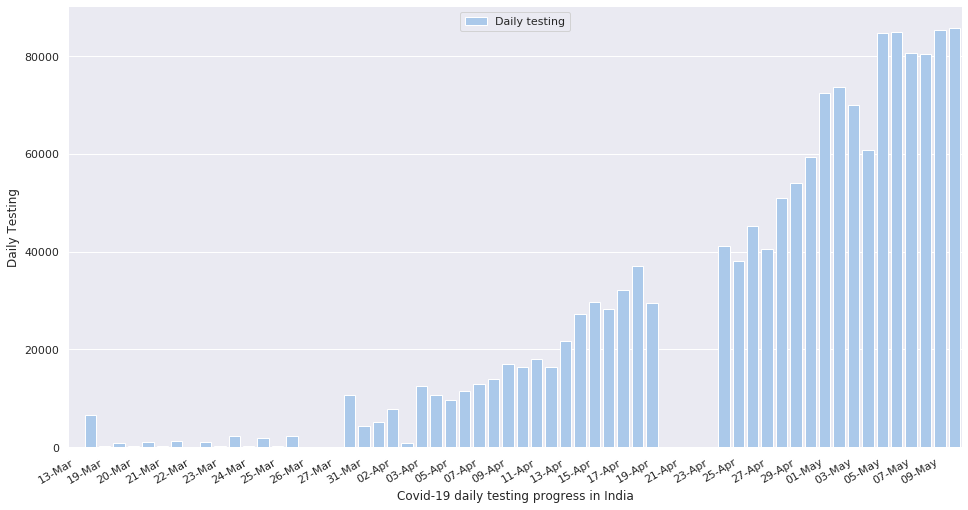

In [6]:

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")

# Plot testing data
sns.barplot(x=df_tested.updatetimestamp, y=df_tested.daily_tested, color='b', label='Daily testing')

# set the frequency for labelling the xaxis
freq = int(2)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df_tested.iloc[::freq].updatetimestamp
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=3, frameon=True)
axs.set(ylabel="Daily Testing", xlabel= "Covid-19 daily testing progress in India")
sns.despine(left=True, bottom=True)